<a href="https://colab.research.google.com/github/Imran0897/Stock-price-prediction-and-forecasting-using-stacked-LSTM/blob/main/Stock_price_prediction_and_forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
key = '84fdc4f3c470ca64f423790287f9b6d85c4f8626'

In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL',api_key = key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-26 00:00:00+00:00,171.51,172.00,170.06,172.00,37121805,40.718845,40.835178,40.374595,40.835178,148487220,0.0,1.0
1,AAPL,2018-01-29 00:00:00+00:00,167.96,170.16,167.07,170.16,48434424,39.876026,40.398336,39.664727,40.398336,193737696,0.0,1.0
2,AAPL,2018-01-30 00:00:00+00:00,166.97,167.37,164.70,165.53,45137026,39.640986,39.735952,39.102057,39.299110,180548104,0.0,1.0
3,AAPL,2018-01-31 00:00:00+00:00,167.43,168.44,166.50,166.87,30984099,39.750196,39.989984,39.529402,39.617245,123936396,0.0,1.0
4,AAPL,2018-02-01 00:00:00+00:00,167.78,168.62,166.76,167.17,38099665,39.833291,40.032719,39.591129,39.688469,152398660,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-01-18 00:00:00+00:00,135.21,138.610,135.03,136.815,69672800,135.21,138.610,135.03,136.815,69672800,0.0,1.0
1253,AAPL,2023-01-19 00:00:00+00:00,135.27,136.250,133.77,134.080,58280413,135.27,136.250,133.77,134.080,58280413,0.0,1.0
1254,AAPL,2023-01-20 00:00:00+00:00,137.87,138.020,134.22,135.280,80223626,137.87,138.020,134.22,135.280,80223626,0.0,1.0
1255,AAPL,2023-01-23 00:00:00+00:00,141.11,143.315,137.90,138.120,81760313,141.11,143.315,137.90,138.120,81760313,0.0,1.0
1256,AAPL,2023-01-24 00:00:00+00:00,142.53,143.160,140.30,140.305,66435142,142.53,143.160,140.30,140.305,66435142,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1

0       171.51
1       167.96
2       166.97
3       167.43
4       167.78
         ...  
1252    135.21
1253    135.27
1254    137.87
1255    141.11
1256    142.53
Name: close, Length: 1257, dtype: float64

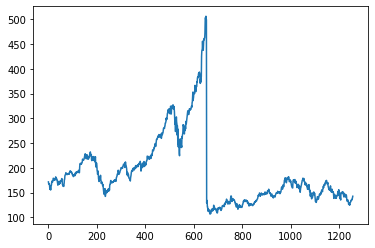

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.16197871],
       [0.15308704],
       [0.15060739],
       ...,
       [0.07772073],
       [0.08583594],
       [0.08939261]])

In [ ]:
df1.shape

(1257, 1)

In [ ]:
training_size = int(len(df1) * 0.7)
test_size = int(len(df1))-training_size
train_data , test_data = df1[0:training_size,:],df1[training_size:,:1]

In [ ]:
train_data

array([[1.61978710e-01],
       [1.53087038e-01],
       [1.50607389e-01],
       [1.51759549e-01],
       [1.52636193e-01],
       [1.34402004e-01],
       [1.24358172e-01],
       [1.40738885e-01],
       [1.31997495e-01],
       [1.21001879e-01],
       [1.24157796e-01],
       [1.39937383e-01],
       [1.44020038e-01],
       [1.51609267e-01],
       [1.65685661e-01],
       [1.64283031e-01],
       [1.62830307e-01],
       [1.60876644e-01],
       [1.64458359e-01],
       [1.71972448e-01],
       [1.80663745e-01],
       [1.79211021e-01],
       [1.78534753e-01],
       [1.70720100e-01],
       [1.73750783e-01],
       [1.75278647e-01],
       [1.74902943e-01],
       [1.70795241e-01],
       [1.75579211e-01],
       [1.83193488e-01],
       [1.87551659e-01],
       [1.83168441e-01],
       [1.79336255e-01],
       [1.79862242e-01],
       [1.78284283e-01],
       [1.71471509e-01],
       [1.71321227e-01],
       [1.61377583e-01],
       [1.55316218e-01],
       [1.45522855e-01],


In [ ]:
test_data

array([[0.10557295],
       [0.10001252],
       [0.09552912],
       [0.09718222],
       [0.09773325],
       [0.09688165],
       [0.10149029],
       [0.10046337],
       [0.10073889],
       [0.09843456],
       [0.09830933],
       [0.09708203],
       [0.09773325],
       [0.10532248],
       [0.10584847],
       [0.11090795],
       [0.10857858],
       [0.0989856 ],
       [0.09983719],
       [0.10356919],
       [0.10737633],
       [0.10715091],
       [0.10399499],
       [0.10194114],
       [0.10459612],
       [0.11591735],
       [0.11268629],
       [0.11438948],
       [0.11724483],
       [0.11887289],
       [0.12485911],
       [0.12090169],
       [0.11829681],
       [0.10552286],
       [0.10697558],
       [0.10339386],
       [0.10567314],
       [0.10507201],
       [0.09823419],
       [0.09041954],
       [0.09164684],
       [0.0977082 ],
       [0.10016281],
       [0.10038823],
       [0.09650595],
       [0.0878397 ],
       [0.09014402],
       [0.086

In [ ]:
import numpy as np

def create_dataset(dataset,time_step = 1):
  dataX , dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step =100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [ ]:
X_train

array([[0.16197871, 0.15308704, 0.15060739, ..., 0.2053851 , 0.20513463,
        0.1974953 ],
       [0.15308704, 0.15060739, 0.15175955, ..., 0.20513463, 0.1974953 ,
        0.19952411],
       [0.15060739, 0.15175955, 0.15263619, ..., 0.1974953 , 0.19952411,
        0.19691922],
       ...,
       [0.03544145, 0.03611772, 0.05247339, ..., 0.10429555, 0.09906074,
        0.08919224],
       [0.03611772, 0.05247339, 0.04578585, ..., 0.09906074, 0.08919224,
        0.09845961],
       [0.05247339, 0.04578585, 0.03812148, ..., 0.08919224, 0.09845961,
        0.09658109]])

In [ ]:
X_train.shape , y_train.shape

((778, 100), (778,))

In [ ]:
X_test.shape , y_test.shape

((277, 100), (277,))

In [ ]:
# reshape input to be [samples , time step , features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
# Create the stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(50,return_sequences=True , input_shape=(100,1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 10s 106ms/step - loss: 0.0357 - val_loss: 5.7542e-04
Epoch 2/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0153 - val_loss: 0.0063
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0102 - val_loss: 4.2433e-04
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0087 - val_loss: 4.4626e-04
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0084 - val_loss: 0.0018
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0074 - val_loss: 3.6461e-04
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 3.2659e-04
Epoch 8/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0063 - val_loss: 2.9991e-04
Epoch 9/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0071 - val_loss: 6.4285e-04
Epoch 10/100
13/13 [==============================] - 0s 18ms/step - l

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [ ]:
## Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.4507696566504

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

155.99142186397975

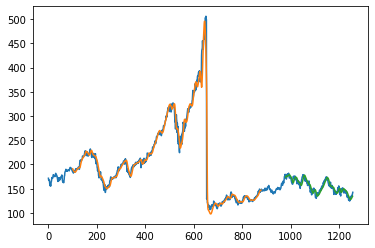

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()